# Linear Regression Model 
* to define whether to focus company's efforts on mobile app or website

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Part 1. Exploratory Data Analysis

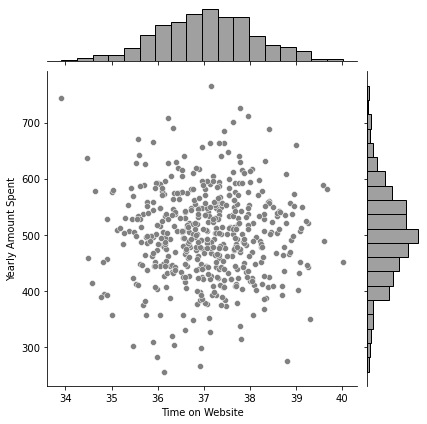

In [14]:
#let's compare Time on Website and Yearly Amount Spent
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers, color='grey', )

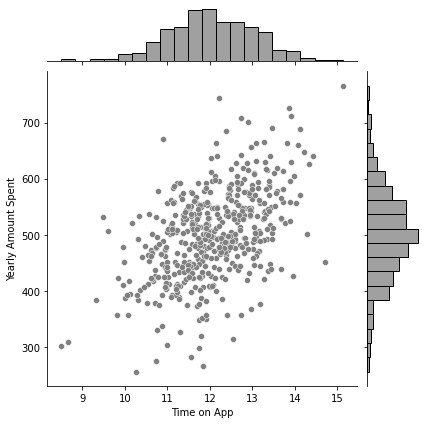

In [15]:
#let's compare Time on App and Yearly Amount Spent
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers, color='grey', )

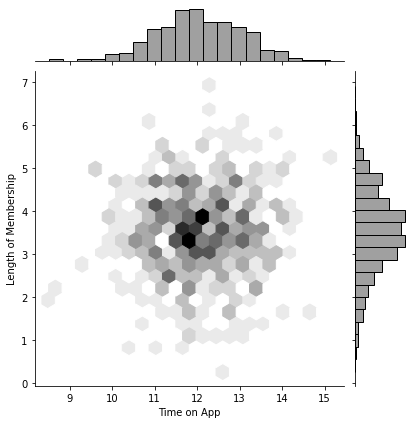

In [16]:
#let's compare Time on App and Length of Membership
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers, kind = 'hex', color = 'grey')

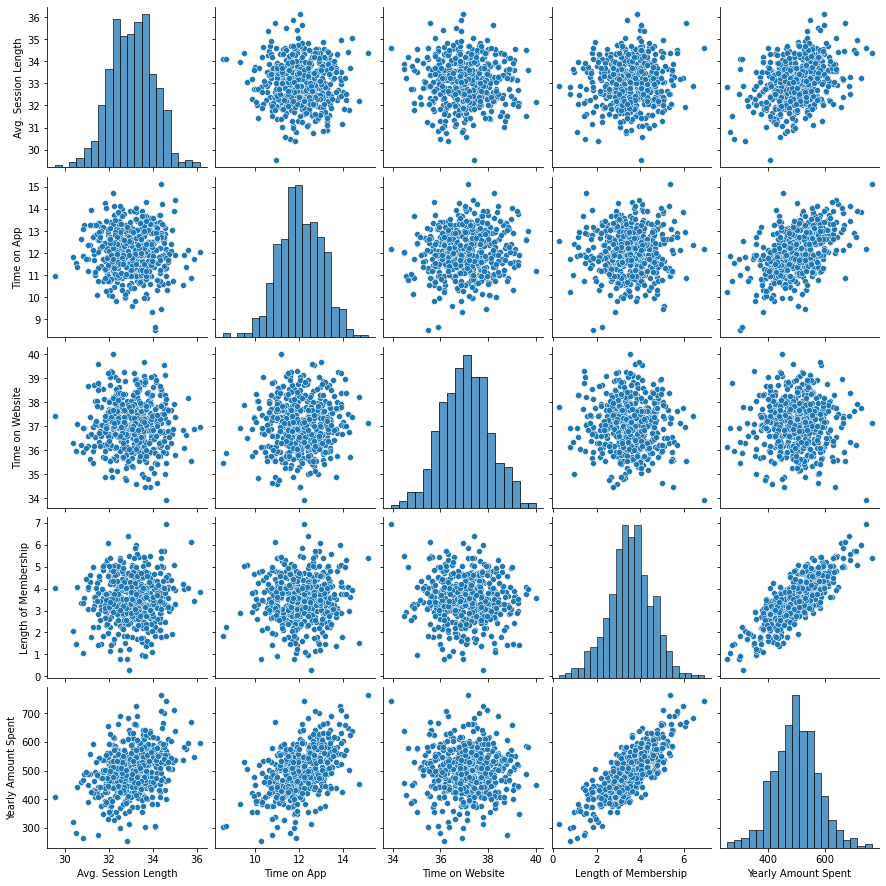

In [25]:
#exploring types of relationship across entire dataset
sns.pairplot(customers)

Based on the plot we can see two correlated features with Yearly Amount Spent: 
1. Length of Membership
2. Time on App
3. Avg Session Length - ?


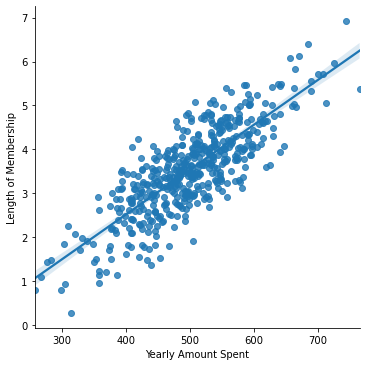

In [30]:
# let's create a linear model plot of Yearly Amount Spent vs. Length of Membership
sns.lmplot(x = 'Yearly Amount Spent', y= 'Length of Membership', data = customers)


### Part 2. Training and Testing Data 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [33]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

#### Training Model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [39]:
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
print(lm.intercept_)

-1047.9327822502385


In [45]:
#dataframe based on the coefficients to organize it 
coef_customers = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
coef_customers

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Predicting Test Data

In [49]:
predict = lm.predict(X_test)
predict

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

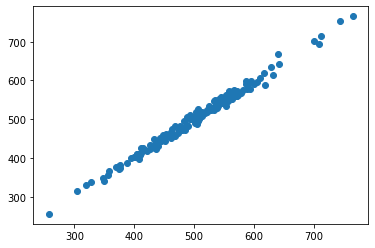

In [50]:
plt.scatter(y_test, predict)

#### Evaluating the Model
- Calculating the residual sum of squares and the explained variance score (R^2).

In [51]:
#Regression evaluation metrics
#Mean Absolute Error
#Mean Squared Error
#Root Mean Squared Error

In [53]:
from sklearn import metrics

In [54]:
MAE = metrics.mean_absolute_error(y_test,predict)
MSE = metrics.mean_squared_error(y_test,predict)
RMSE = np.sqrt(MSE)

In [64]:
metrics = pd.DataFrame([MAE, MSE, RMSE], ['MAE', 'MSE', 'RMSE'], ['Coeff'])

In [65]:
metrics

,Coeff
MAE,7.228149
MSE,79.813052
RMSE,8.933815


#### Residuals

/Users/andriiadamchuk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

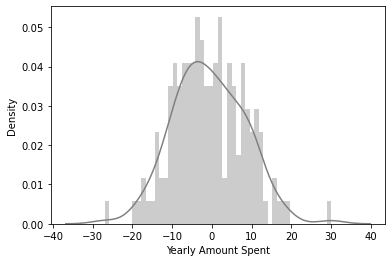

In [70]:
sns.distplot(y_test - predict, bins=50, color = 'grey')

As we have normally distributed residuals it means that the model was the right choice for the dataset

# Conclusion

As we can see from the Coeff column above if we hold all features fixed, 
- increase 1 unit of Time spent on App associated with 38 dollars more spends per year
- increase 1 unit of Time spent on Website associated with 0.19 dollars more spends per year

In [71]:
#dataframe based on the coefficients to organize it 
coef_customers = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
coef_customers

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
